# Aprendizaje supervisado - *k* vecinos más cercanos

El clasificdor basado en los *k* vecinos más cercanos, usa la información del conjunto de entrenamiento para calcular las distancias entre la observación de test o validación y las observaciones de entrenamiento. Usualmente se utiliza la distancia euclidea para encontrar los vecinos más cercanos a la muestra de validación.

$$d(X_{i},X_{j})=\sqrt{\sum_{r=1}^{p}(x_{ri}-x_{rj})^{2}}$$

Una vez se han encontrado los *k* vecinos, se procede a aplicar una regla mayoritaria para elegir la clase de la nueva muestra. 



** Ejercicio 1**

Elabora un algoritmo de clasificación basado en los *k* vecinos más cercanos y utilizando la distancia euclidea. Como datos de entrenamiento utiliza como matriz de observaciones el siguiente *toyset*:

$$X_{train} =\left[\begin{array}{cc}
2.1 & 1.3\\
1.3 & 3.2\\
2.9 & 2.5\\
2.7 & 5.4\\
3.8 & 0.9\\
7.3 & 2.1\\
4.2 & 6.5\\
3.8 & 3.7\\
2.5 & 4.1\\
3.4 & 1.9\\ 
5.7 & 3.5\\
6.1 & 4.3\\
5.1 & 2.2\\
6.2 & 1.1
\end{array}\right]$$

como vector de etiquetas:

$$y_{train} = [0\quad0\quad0\quad1\quad0\quad0\quad1\quad1\quad1\quad0\quad1\quad1\quad1\quad1]^{\top}$$

y como test:

$$X_{test}= [4.3 \quad  2.7]$$

El algoritmo debe cumplir lo siguiente:

1. Se debe poder elegir el valor de los vecinos más cercanos.
2. Debe mostrar las distancias a todos los elementos del entrenamiento.
3. Debe mostrar el índice y valor de las observaciones elegidas como las *k* más cercanas.
4. Debe otorgarle  una etiqueta al test a partir de la regla mayoritaria.
5. Debe mostrar gráficamente todo el conjunto de entrenamiento, el test y los *k* vecicnos más cercanos.


In [83]:
#espacio para resolver el ejercicio 1
import numpy as np
import math
import statistics
y_train = np.array([0,0,0,1,0,0,1,1,1,0,1,1,1,1])
X_train = np.array([[2.1,1.3],
           [1.3,3.2],
           [2.9,2.5],
           [2.7,5.4],
           [3.8,0.9],
           [7.3,2.1],
           [4.2,6.5],
           [3.8,3.7],
           [2.5,4.1],
           [3.4,1.9],
           [5.7,3.5],
           [6.1,4.3],
           [5.1,2.2],
           [6.2,1.1]])


X_test = np.array([4.3,2.7])

k = 2
NumeroDistancias = X_train.shape
NumeroDistancias = NumeroDistancias[0]
diccionario = {}
distancias = []
etiquetas = []

for i in range(NumeroDistancias):
    distancias.append(math.sqrt((X_train[i,0]-X_test[0])**2+(X_train[i,1]-X_test[1])**2))


for x in range(len(distancias)):
    diccionario.update({distancias[x]:y_train[x]})

    
distanciasOrdenadas = sorted(distancias)
print(distanciasOrdenadas)

for x in range(k):
    p = distanciasOrdenadas[x]
    etiquetas.append(diccionario.get(p))

    
print(etiquetas)
print(statistics.mode(etiquetas))

[0.9433981132056602, 1.118033988749895, 1.2041594578792296, 1.414213562373095, 1.61245154965971, 1.8681541692269408, 2.280350850198275, 2.408318915758459, 2.4839484696748446, 2.6076809620810595, 3.0413812651491097, 3.059411708155671, 3.138470965295043, 3.8013155617496426]
[1, 1]
1


## Implementación del clasificador basado en los *k* vecinos más cercanos o *k*-NN

In [1]:
#cargamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt #librerías para graficar
import matplotlib.cm as cm
from sklearn import neighbors, datasets
plt.style.use('_classic_test') #cambia el estilo de los gráficos

In [2]:
print(plt.style.available) #imprime los posibles estilos. No se necesita para el código pero hay unos muy bonitos :)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [3]:
#cargamos los datos de entrada
input_file = 'Data_kNN.txt' #almacenamos el nombre del archivo
data = np.genfromtxt(input_file, delimiter=',', skip_header=True) #almacenamos la información 
X, y = data[:,:-1], data[:,-1].astype(np.int) #dividimos la información del archivo en la matriz de observaciones y el vector de etiquetas


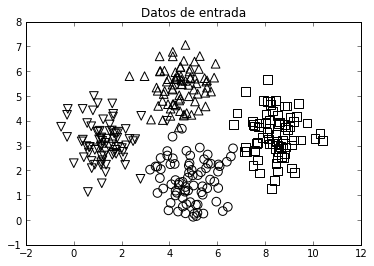

In [4]:
#visualizamos los datos de entrada. Esta es una forma diferente para graficar, aunque lo generado en clases anteriores también
#se puede utilizar
plt.figure()  #generamos una nueva figura
plt.title('Datos de entrada')  #asignamos un título
marcadores = 'v^os' #definimos una cadena de marcadores para hacer más fácil la gráfica 
marcador = [marcadores[i] for i in y] #generamos una lista con los marcadores 
for i in range(X.shape[0]): 
    plt.scatter(X[i, 0], X[i, 1], marker=marcador[i],  #graficamos observación por observación   
            s=75, edgecolors='black', facecolors='none')
plt.show() #generamos la gráfica

In [5]:
NN = 11 #definimos le número de vecinos (en lo posible elegir números impares)
clasificador = neighbors.KNeighborsClassifier(NN, weights = 'distance') #instanciamos el clasificador

** Ejercicio 2**

Realiza la partición de la base de datos en 70% entrenamiento, 30% validación o test

In [7]:
#espacio para resolver el ejercicio 2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape, X_test.shape)


(210, 2) (90, 2)


In [8]:
clasificador.fit(X_train,y_train) #entrenamos el clasificador

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='distance')

** Ejercicio 3**

Visualiza las fronteras del clasificador con el conjunto de entrenamiento

In [ ]:
#espacio para resolver el ejercio 3

In [ ]:
y_pred = clasificador.predict(X_test) #realizamos la predicción de la etiqueta para el conjunto de validación

** Ejercicio 4 **

Imprime el acierto de clasificación en porcentaje y grafica las fronteras del clasificador para el conjunto de validación

In [ ]:
#espacio para resolver el ejercicio 4